In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN,Birch, MeanShift, SpectralClustering,AffinityPropagation, OPTICS
from scipy.cluster.hierarchy  import dendrogram, linkage


# Reading Dataset

In [4]:
df=pd.read_csv("CC GENERAL.csv")

In [5]:
print("shape:", df.shape)

shape: (8950, 18)


# checking datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# checking Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

# Check Nan values

In [9]:
missing=df.isnull().sum().sort_values(ascending=False)
missing

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CUST_ID                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df_orig = df.copy()

# Remove Nan rows

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Drop customer ID

In [13]:
df.drop('CUST_ID',axis=1,inplace=True)

In [10]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Feature Selection

In [14]:
df=df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']]
corr=df.corr()
corr

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
BALANCE,1.000000,0.176083,0.159985,0.122109,0.495586,0.322830,0.535518
PURCHASES,0.176083,1.000000,0.916780,0.679259,-0.053760,0.606782,0.358425
ONEOFF_PURCHASES,0.159985,0.916780,1.000000,0.329650,-0.033244,0.570850,0.320613
INSTALLMENTS_PURCHASES,0.122109,0.679259,0.329650,1.000000,-0.066099,0.385391,0.258057
CASH_ADVANCE,0.495586,-0.053760,-0.033244,-0.066099,1.000000,0.459342,0.304161
PAYMENTS,0.322830,0.606782,0.570850,0.385391,0.459342,1.000000,0.426951
CREDIT_LIMIT,0.535518,0.358425,0.320613,0.258057,0.304161,0.426951,1.000000


# Histogram for Balance column

<Axes: >

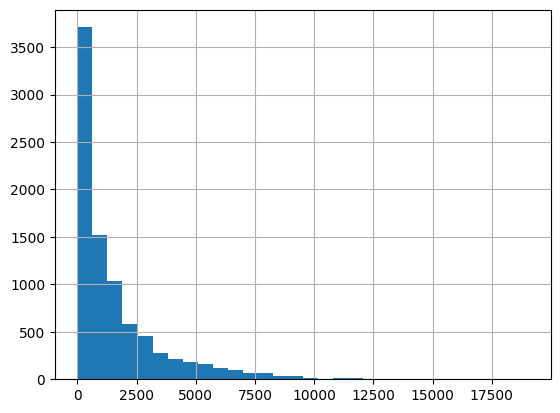

In [14]:
df['BALANCE'].hist(bins=30)

# Boxplot for cash advance

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce41ed6210>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce41ed6490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce41ed60d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce41ed6710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce41ed6850>],
 'means': []}

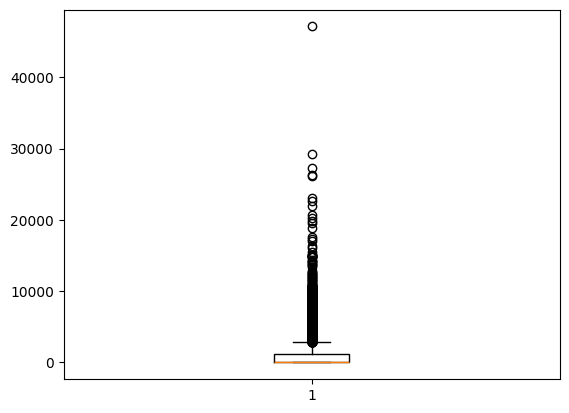

In [15]:
plt.boxplot(df['CASH_ADVANCE']) #higly right skewed,ouliers present

# Scatter plot

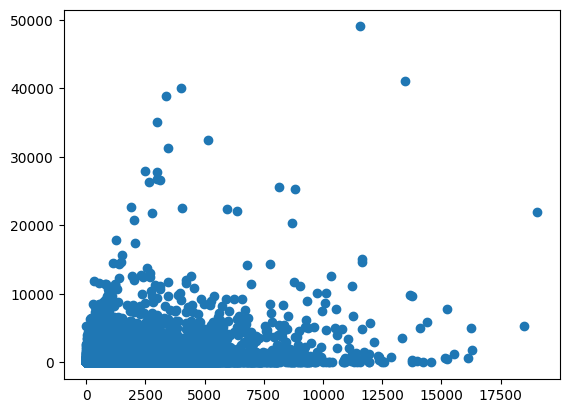

In [16]:
plt.scatter(df['BALANCE'], df['PURCHASES'])# tells High balance not equal to  high spending

# Check Correlation

<Axes: >

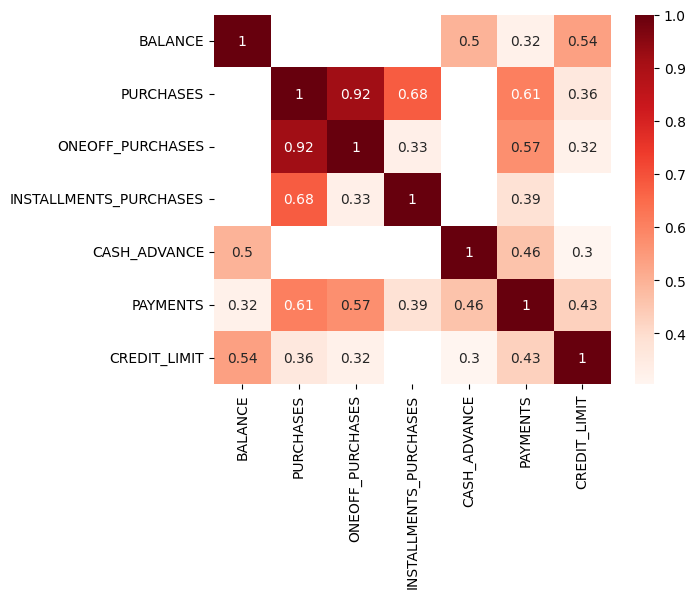

In [17]:

sns.heatmap(corr[(corr<-0.30)|(corr>0.30)],cmap='Reds',annot=True)

# Count of 0 in each column

In [12]:
for col in df.columns:
    print(col,'-----',df[col].eq(0).sum())

BALANCE ----- 6
PURCHASES ----- 1967
ONEOFF_PURCHASES ----- 4113
INSTALLMENTS_PURCHASES ----- 3747
CASH_ADVANCE ----- 4431
PAYMENTS ----- 0
CREDIT_LIMIT ----- 0


# Feature Selection

In [15]:
# since high correlation between PURCHASES AND ONE-OFF-PURCHSASES remove the later column.
df=df[['BALANCE','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']]

# Feature Scaling

In [16]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(df)
x_scaled = pd.DataFrame(x_scaled, columns=df.columns)
x_scaled.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
0,-0.447578,-0.253947,0.001270,0.00000,-0.453400,-0.408163
1,1.167856,-0.340469,-0.195777,5.68971,2.092126,0.816327
2,0.806445,0.360748,-0.195777,0.00000,-0.179180,0.918367
3,-0.050657,-0.325958,-0.195777,0.00000,-0.142466,-0.367347
4,0.456274,0.868732,2.558094,0.00000,0.328453,-0.244898


# KMeans Algorithm

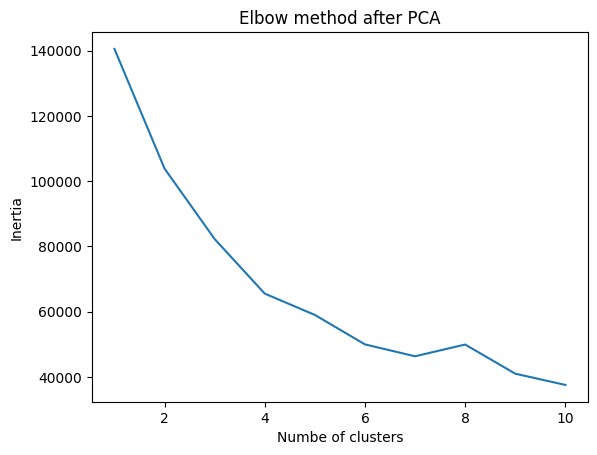

In [21]:
inertia=[]
K=range(1,11)
for i in K:
    kmean=KMeans(n_clusters=i,random_state=42,init='k-means++')
    kmean.fit(x_scaled)
    inertia.append(kmean.inertia_)
plt.plot(K,inertia)
plt.xlabel("Numbe of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method after PCA")
plt.show() 
    

# Finding silhouette score

In [30]:
silhouette_scores =[]

for k in range(2,11):  # silhouette requires k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++')
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    silhouette_scores.append(score)    
    print(f"k = {k}, Silhouette Score = {score:.4f}")
    print(f"k={k}",np.bincount(labels))

k = 2, Silhouette Score = 0.7142
k=2 [ 425 8211]
k = 3, Silhouette Score = 0.5618
k=3 [ 870 7647  119]
k = 4, Silhouette Score = 0.5491
k=4 [ 786 6955   35  860]
k = 5, Silhouette Score = 0.4346
k=5 [ 769 6311   32  211 1313]
k = 6, Silhouette Score = 0.4416
k=6 [1045 5960   30  217 1286   98]
k = 7, Silhouette Score = 0.4052
k=7 [ 356 5517   30  207 1222   36 1268]
k = 8, Silhouette Score = 0.3096
k=8 [ 735 1641   75  498   16   13  215 5443]
k = 9, Silhouette Score = 0.3327
k=9 [ 110 1528   71  451   15   13  214 5164 1070]
k = 10, Silhouette Score = 0.3391
k=10 [  56 1391   68  438   15   13  210 4829 1257  359]


In [23]:
# Kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42,init='k-means++')
clusters = kmeans.fit_predict(x_scaled)


# Assigning Cluster labels

In [24]:
df['kmeans_Cluster'] = clusters

In [25]:
df['kmeans_Cluster'].value_counts()

kmeans_Cluster
1    6955
3     860
0     786
2      35
Name: count, dtype: int64

# Grouping clusters

In [ ]:
cluster_summary = df.groupby('kmeans_Cluster').mean()
print(cluster_summary)

# Mapping names to clusters

In [ ]:
cluster_names = {
    0: 'Cash-Heavy Credit Users',
    1: 'Low Usage Customers',
    2: 'Big Spenders',
    3: 'Regular Shoppers'
}

df['Cluster_Name'] = df['kmeans_Cluster'].map(cluster_names)

In [ ]:
df[['kmeans_Cluster', 'Cluster_Name']].head()

# Cluster Visualization

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster_Name',       # Color by cluster
    palette='Set1',           # Color palette
    s=80                     # Marker size
)

plt.title('KMeans Clusters (Balance vs Purchases)')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.legend(title='kmeans_Cluster')
plt.show()

# Agglomerative clustering

In [20]:

silhouette_score1 = {}

for k in range(2, 11):  
    agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = agg.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    silhouette_score1[k] = score
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.881
k=3, Silhouette Score=0.423
k=4, Silhouette Score=0.452
k=5, Silhouette Score=0.447
k=6, Silhouette Score=0.414
k=7, Silhouette Score=0.415
k=8, Silhouette Score=0.386
k=9, Silhouette Score=0.387
k=10, Silhouette Score=0.388


# DENDROGRAM

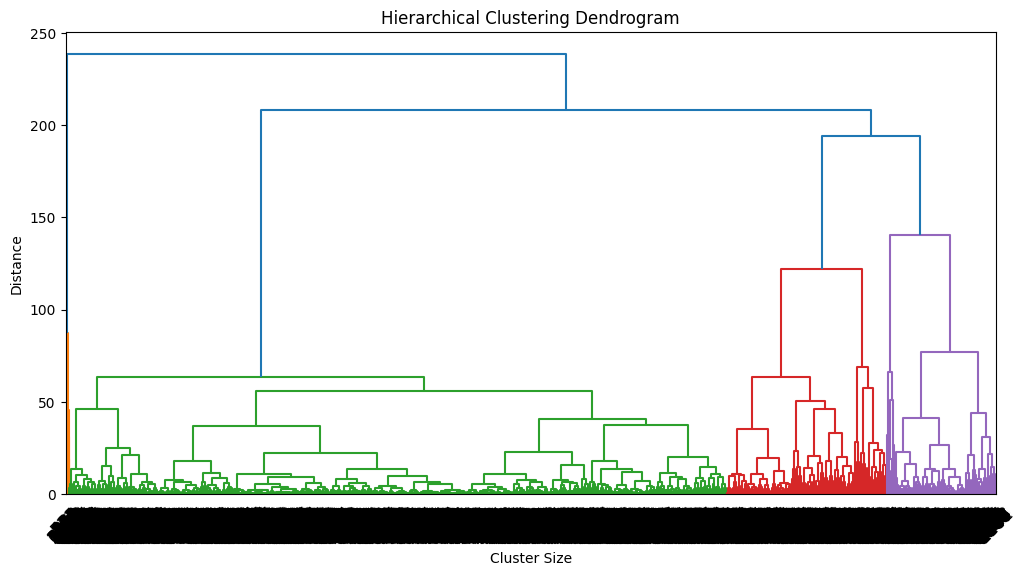

In [36]:

linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    leaf_rotation=45,
    leaf_font_size=12
)
#truncate_mode='lastp',  # show only last clusters
 #p=10,
#plt.axhline(y=125, color='red', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()
#to know no.of cluster draw horizontal line to middle of longest veritcal distance bar and find no.of verticallines that intersect with horizontal line.here 5

# BIRCH ALGORTIHM

In [21]:
results = {}
for k in range(2, 11):
    birch_model = Birch(n_clusters=k)
    birch_clusters = birch_model.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, birch_clusters)
    print(f"BIRCHk={k}, Silhouette Score={score:.3f}")
    print(f"k={k}",np.bincount(birch_clusters))#size of clusters

BIRCHk=2, Silhouette Score=0.884
k=2 [8606   30]
BIRCHk=3, Silhouette Score=0.725
k=3 [8463   30  143]
BIRCHk=4, Silhouette Score=0.669
k=4 [8255   30  143  208]
BIRCHk=5, Silhouette Score=0.520
k=5 [  30 7778  143  208  477]
BIRCHk=6, Silhouette Score=0.520
k=6 [ 143 7778   19  208  477   11]
BIRCHk=7, Silhouette Score=0.521
k=7 [7778  208   19  131  477   11   12]
BIRCHk=8, Silhouette Score=0.460
k=8 [ 208  131   19  904  477   11   12 6874]
BIRCHk=9, Silhouette Score=0.460
k=9 [ 131  165   19  904  477   11   12 6874   43]
BIRCHk=10, Silhouette Score=0.461
k=10 [ 165  477   19  904  106   11   12 6874   43   25]


# Meanshift Algorithm

In [37]:
meanshift_scores = {}
for bw in [0.8, 1.0, 1.2, 1.5]:
    meanshift_model = MeanShift(bandwidth=bw, bin_seeding=True)#bin_seeding true means initiazlies cluster center for faster processing.
    labels = meanshift_model.fit_predict(x_scaled)
    if len(np.unique(labels)) > 1:
        score = silhouette_score(x_scaled, labels)
        meanshift_scores[bw] = score
#best_bw = max(meanshift_scores, key=meanshift_scores.get)
#best_score = meanshift_scores[best_bw]
        print("Bandwidth:", bw,"-----","Silhouette:", round(score, 4))
     

Bandwidth: 0.8 ----- Silhouette: 0.1543
Bandwidth: 1.0 ----- Silhouette: 0.1834
Bandwidth: 1.2 ----- Silhouette: 0.2247
Bandwidth: 1.5 ----- Silhouette: 0.2763


# Spectral Clustering

In [16]:
for k in range(2, 7):
    spectral_model = SpectralClustering(
        n_clusters=k,
        affinity='nearest_neighbors',   
        n_neighbors=10,
        assign_labels='kmeans',
        random_state=42
    )
    labels = spectral_model.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    print(f"Spectral k={k}, Silhouette={score:.3f}")

Spectral k=2, Silhouette=0.257
Spectral k=3, Silhouette=0.186
Spectral k=4, Silhouette=-0.047
Spectral k=5, Silhouette=-0.023
Spectral k=6, Silhouette=0.000


# DBSCAN

In [24]:
dbscan_results = []
for eps in [0.8, 1.0, 1.2, 1.5, 1.8]:
    for min_samples in [15, 20, 25, 30]:
            dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan_model.fit_predict(x_scaled)
            # Remove noise (-1)
            mask = labels != -1
        # DBSCAN valid only if >= 2 clusters (excluding noise)
            if len(set(labels[mask])) > 1:
                    score = silhouette_score(x_scaled[mask], labels[mask])
                    dbscan_results.append({
                    "eps": eps,
                    "min_samples": min_samples,
                    "clusters": len(set(labels[mask])),
                     "silhouette": score
                })
 # Sort by silhouette score
dbscan_results = sorted(dbscan_results, key=lambda x: x["silhouette"], reverse=True)

# Show best result
dbscan_results

[{'eps': 1.0,
  'min_samples': 15,
  'clusters': 2,
  'silhouette': np.float64(0.6178662932244354)},
 {'eps': 1.0,
  'min_samples': 20,
  'clusters': 2,
  'silhouette': np.float64(0.5704529415211674)}]

# Affinity Propogation

In [ ]:
# Based on the above choosing BIRCHk=3, Silhouette Score=0.725

In [32]:
affinity_results = []

for pref in [-50, -100, -200,-300]:
    affinity_model = AffinityPropagation(
        preference=pref,
        damping=0.75,
        random_state=42
    )

    labels = affinity_model.fit_predict(x_scaled)
    n_clusters = len(np.unique(labels))
    # Valid only if 2 ≤ clusters < n_samples
    if 2 <= n_clusters < len(x_scaled):
        score = silhouette_score(x_scaled, labels)
        affinity_results.append({
            "preference": pref,
            "clusters": n_clusters,
            "silhouette": score
        })
# Sort by silhouette score
affinity_results = sorted(
    affinity_results, key=lambda x: x["silhouette"], reverse=True
)

affinity_results


[{'preference': -300,
  'clusters': 39,
  'silhouette': np.float64(0.20701958054587946)},
 {'preference': -200,
  'clusters': 50,
  'silhouette': np.float64(0.19694986944119694)},
 {'preference': -50,
  'clusters': 118,
  'silhouette': np.float64(0.19146927052419957)},
 {'preference': -100,
  'clusters': 75,
  'silhouette': np.float64(0.17437814446449218)}]

# Finalized Model-BIRCH

In [22]:
birch_model = Birch(n_clusters=3)
final_clusters = birch_model.fit_predict(x_scaled)

In [24]:
df.columns

Index(['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PAYMENTS', 'CREDIT_LIMIT'],
      dtype='object')

In [25]:
df['Cluster']=final_clusters
df['Cluster'].value_counts()

Cluster
0    8463
2     143
1      30
Name: count, dtype: int64

In [26]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

             BALANCE     PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Cluster                                                                    
0        1531.376250    938.919247              395.759054    832.649260   
1        5394.324462  24884.145333             7218.392333   1354.393534   
2        4939.239417   1140.202727              479.329441  10478.023247   

             PAYMENTS  CREDIT_LIMIT  
Cluster                              
0         1508.376622   4392.074694  
1        24994.148194  16053.333333  
2        13255.503990   9797.552448  


In [27]:
cluster_names = {
    0: 'Low spenders',
    1: 'Premium High-Value Customers',
    2: 'Cash Advance–Dependent Customers',
    
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)

In [28]:
df[df['Cluster_Name']=='Premium High-Value Customers']

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,Cluster,Cluster_Name
138,19043.138560,22009.92,12560.85,0.000000,23018.575830,18000.0,1,Premium High-Value Customers
273,5131.319584,32539.78,5992.35,0.000000,26652.344320,11500.0,1,Premium High-Value Customers
501,13479.288210,41050.40,426.34,0.000000,36066.750680,17000.0,1,Premium High-Value Customers
507,2643.343414,26402.39,4145.00,0.000000,24529.276620,16500.0,1,Premium High-Value Customers
550,11547.520010,49039.57,8278.32,558.166886,46930.598240,22500.0,1,Premium High-Value Customers
587,2492.726282,27957.68,4924.71,0.000000,27255.007520,9000.0,1,Premium High-Value Customers
645,1482.235539,14604.87,12128.94,0.000000,14462.630560,15500.0,1,Premium High-Value Customers
854,4419.302940,12551.95,1650.71,14896.540510,31698.419020,17000.0,1,Premium High-Value Customers
941,2072.457624,17409.21,6146.04,0.000000,19517.161600,19500.0,1,Premium High-Value Customers
970,3108.393701,26582.34,11423.44,0.000000,26557.097240,28000.0,1,Premium High-Value Customers


In [29]:
df.to_csv('cluster.csv',index=False)

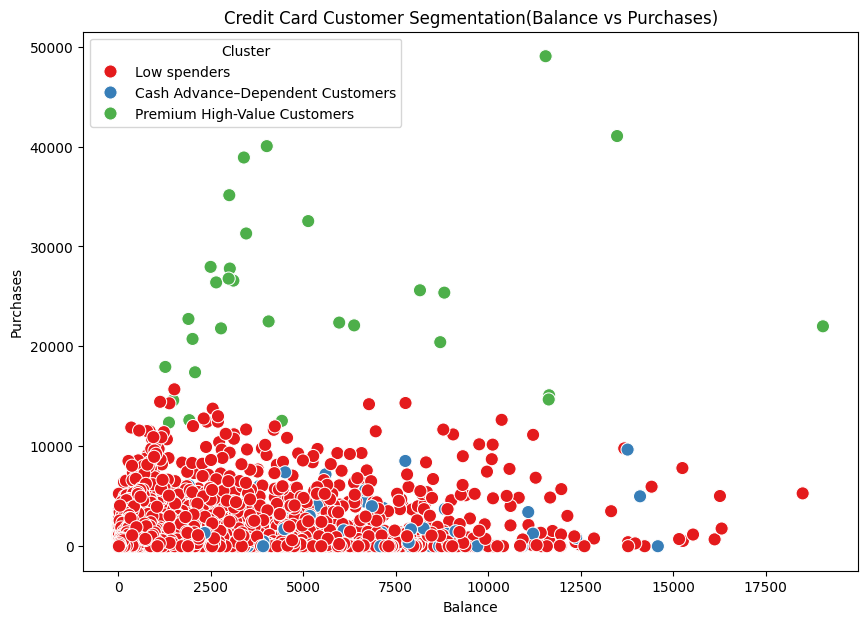

In [60]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster_Name',       # Color by cluster
    palette='Set1',           # Color palette
    s=90                     # Marker size
)

plt.title('Credit Card Customer Segmentation(Balance vs Purchases)')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.legend(title='Cluster')
plt.show()

In [30]:
import pickle 
filename="Finalized_ClusterModel.sav"
pickle.dump(birch_model,open(filename,'wb'))

In [31]:
scalarFile="Final_scalar.sav"
pickle.dump(scaler,open(scalarFile,'wb'))